#IMPORTAR LIBRERIAS

In [ ]:
# Tratamiento de Datos
#=======================================================
import pandas as pd
import numpy as np
import scipy.stats as stats
import random

# Graficos
import seaborn as sns
import matplotlib.pyplot as plt


# Preparación de Datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


Se tienen datos metereologicos del oriente antioqueño de la estacion San Antonio de Pereira del 2019 al 2024, proporcinados por CORNARE

| Campo | Descripción | Ejempo |
| :--- | :--- |:--- |
| Estación | Estacion donde se realiza la medicion  | San Antonio de Pereira |
| Fecha inicial | Fecha y hora de inicio  de registro  | 01/01/2024 01:00|
| Fecha inicial | Fecha y hora de fin de registro  | 01/01/2024 01:59|
| P | Presión atmosférica medida|591.8  |
| CO | Concentración de monóxido de carbono (CO) | 619.8 |
| NO| Concentración de dióxido de nitrógeno (NO₂)|6.4 |
| O3 |Concentración de ozono (O₃)  | 40.7 |
| PM2.5| Partículas en suspensión de tamaño menor a 2.5 micras (PM2.5)  | 8.3 |
| PM10| Partículas en suspensión de tamaño menor a 10 micras (PM10)  | 8.3|
| DViento | Dirección del viento. |202.5 |
| HAire10 | HAire10: Humedad del aire (a 10 metros de altura) | 91.0 |
| PLiquida | Precipitación líquida o cantidad de lluvia | 0.25 |
| RGolbal  | Radiación solar global |1.8  |
| TAire10| Temperatura del aire (a 10 metros de altura)  | 17.3 |
| Vviento | Velocidad del viento  |  0.9|
| SO2| Concentración de dióxido de azufre (SO₂)  | 0.9|

#CARGAR DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DATOS
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
df2019=pd.read_csv('/content/drive/MyDrive/DATOS/2019.csv')
df2020=pd.read_csv('/content/drive/MyDrive/DATOS/2020.csv')
df2021=pd.read_csv('/content/drive/MyDrive/DATOS/2021.csv')
df2022=pd.read_csv('/content/drive/MyDrive/DATOS/2022.csv')
df2023=pd.read_csv('/content/drive/MyDrive/DATOS/2023.csv')
df2024=pd.read_csv('/content/drive/MyDrive/DATOS/2024.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DATOS


#EXPLORACIÓN DE DATOS

Realizamos a explorar los datos contienen los archivos mediantea DataSet

In [ ]:
print(df2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Estacion       106 non-null    object 
 1   Fecha inicial  106 non-null    object 
 2   Fecha final    0 non-null      float64
 3   P              87 non-null     float64
 4   VViento        87 non-null     float64
 5   DViento        87 non-null     float64
 6   PLiquida       87 non-null     float64
 7   PM2.5          69 non-null     float64
 8   PM10           69 non-null     float64
 9   HAire10        87 non-null     float64
 10  TAire10        87 non-null     float64
 11  NO2            102 non-null    float64
 12  O3             103 non-null    float64
 13  SO2            59 non-null     float64
 14  CO             78 non-null     float64
dtypes: float64(13), object(2)
memory usage: 12.5+ KB
None


In [ ]:
print(df2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Estacion       251 non-null    object 
 1   Fecha inicial  251 non-null    object 
 2   Fecha final    0 non-null      float64
 3   NO2            234 non-null    float64
 4   VViento        232 non-null    float64
 5   O3             243 non-null    float64
 6   DViento        232 non-null    float64
 7   PLiquida       232 non-null    float64
 8   PM2.5          214 non-null    float64
 9   SO2            193 non-null    float64
 10  PM10           214 non-null    float64
 11  RGlobal        12 non-null     float64
 12  HAire10        232 non-null    float64
 13  CO             218 non-null    float64
 14  TAire10        232 non-null    float64
 15  P              220 non-null    float64
dtypes: float64(14), object(2)
memory usage: 31.5+ KB
None


In [ ]:
print(df2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Estacion       238 non-null    object 
 1   Fecha inicial  238 non-null    object 
 2   Fecha final    0 non-null      float64
 3   VViento        236 non-null    float64
 4   O3             236 non-null    float64
 5   DViento        234 non-null    float64
 6   PLiquida       236 non-null    float64
 7   HAire10        236 non-null    float64
 8   CO             235 non-null    float64
 9   NO2            235 non-null    float64
 10  P              235 non-null    float64
 11  PM2.5          234 non-null    float64
 12  SO2            233 non-null    float64
 13  PM10           234 non-null    float64
 14  RGlobal        236 non-null    float64
 15  TAire10        235 non-null    float64
dtypes: float64(14), object(2)
memory usage: 29.9+ KB
None


In [ ]:
print(df2023.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Estacion       170 non-null    object 
 1   Fecha inicial  170 non-null    object 
 2   Fecha final    0 non-null      float64
 3   VViento        169 non-null    float64
 4   O3             169 non-null    float64
 5   DViento        169 non-null    float64
 6   PLiquida       169 non-null    float64
 7   HAire10        169 non-null    float64
 8   CO             167 non-null    float64
 9   NO2            169 non-null    float64
 10  P              163 non-null    float64
 11  PM2.5          165 non-null    float64
 12  SO2            155 non-null    float64
 13  PM10           165 non-null    float64
 14  RGlobal        169 non-null    float64
 15  TAire10        169 non-null    float64
dtypes: float64(14), object(2)
memory usage: 21.4+ KB
None


In [ ]:
print(df2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Estacion       312 non-null    object 
 1   Fecha inicial  312 non-null    object 
 2   Fecha final    0 non-null      float64
 3   P              212 non-null    float64
 4   VViento        274 non-null    float64
 5   O3             262 non-null    float64
 6   DViento        274 non-null    float64
 7   PLiquida       284 non-null    float64
 8   PM2.5          257 non-null    float64
 9   PM10           258 non-null    float64
 10  RGlobal        260 non-null    float64
 11  HAire10        284 non-null    float64
 12  CO             268 non-null    float64
 13  TAire10        302 non-null    float64
 14  NO2            246 non-null    float64
 15  SO2            218 non-null    float64
dtypes: float64(14), object(2)
memory usage: 39.1+ KB
None


In [ ]:
print(df2021.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Estacion       146 non-null    object 
 1   Fecha inicial  146 non-null    object 
 2   Fecha final    0 non-null      float64
 3   NO2            143 non-null    float64
 4   VViento        145 non-null    float64
 5   O3             145 non-null    float64
 6   DViento        145 non-null    float64
 7   PLiquida       145 non-null    float64
 8   PM2.5          146 non-null    float64
 9   SO2            133 non-null    float64
 10  PM10           146 non-null    float64
 11  RGlobal        72 non-null     float64
 12  HAire10        145 non-null    float64
 13  CO             146 non-null    float64
 14  TAire10        146 non-null    float64
 15  P              73 non-null     float64
dtypes: float64(14), object(2)
memory usage: 18.4+ KB
None


In [ ]:
df2023.head(5)

,Estacion,Fecha inicial,Fecha final,VViento,O3,DViento,PLiquida,HAire10,CO,NO2,P,PM2.5,SO2,PM10,RGlobal,TAire10
0,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-17,NaN,0.956522,37.426087,167.727273,1.460870,84.086957,855.704348,8.630435,590.516667,9.756522,1.345455,19.991304,200.304348,18.760870
1,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-16,NaN,0.608333,19.613636,214.772727,0.054167,87.583333,990.604348,17.358824,590.318182,8.613636,1.375000,18.854545,146.208333,18.000000
2,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-15,NaN,0.625000,40.845833,227.045455,0.175417,86.791667,795.820833,7.375000,590.175000,6.066667,1.384615,14.729167,101.583333,17.841667
3,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-14,NaN,0.566667,35.087500,135.978261,0.031667,82.583333,947.258333,14.505556,589.591667,9.266667,1.587500,21.375000,173.041667,19.191667
4,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-13,NaN,0.812000,41.604000,147.600000,0.000000,83.360000,860.688000,6.721429,589.954167,10.412000,1.327778,20.532000,246.000000,18.788000


In [ ]:
# Seleccionar columnas relevantes para el análisis
columns_of_interest = ['P', 'CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'DViento', 'HAire10',
                       'PLiquida', 'RGlobal', 'TAire10', 'VViento', 'SO2']

Text(0.5, 1.0, 'Matriz de Correlación')

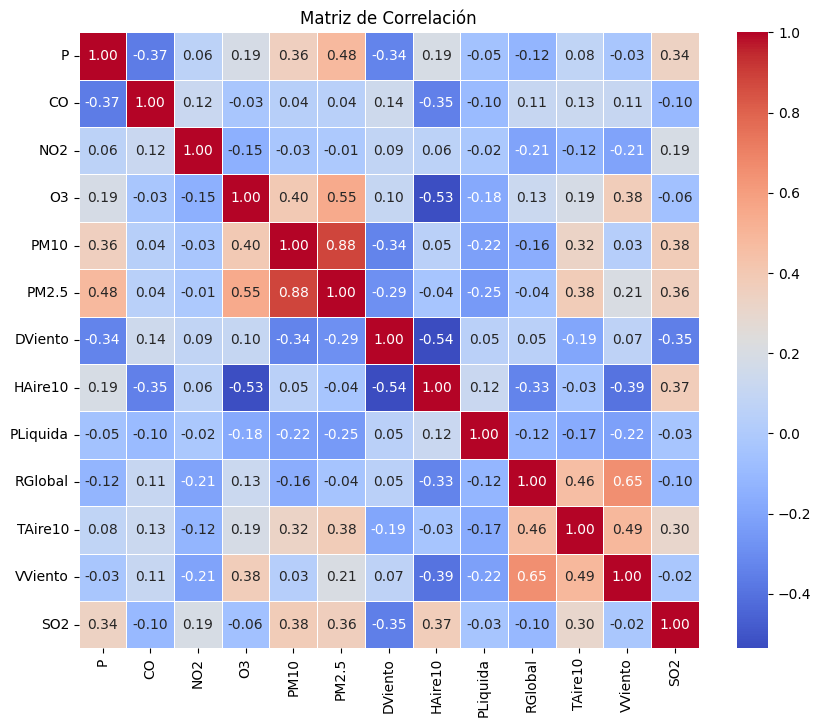

In [ ]:
# Calcular la matriz de correlación usando la lista columns_of_interest
correlation_matrix = df2024[columns_of_interest].corr()

# Configurar el tamaño de la gráfica
plt.figure(figsize=(10, 8))

# Crear el heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Agregar título
plt.title("Matriz de Correlación")

In [ ]:
df2024.columns

Index(['Estacion', 'Fecha inicial', 'Fecha final', 'VViento', 'O3', 'DViento',
       'PLiquida', 'HAire10', 'CO', 'NO2', 'P', 'PM2.5', 'SO2', 'PM10',
       'RGlobal', 'TAire10'],
      dtype='object')

Como los datos solo contienen datos de una estacion procederemos a eliminar la columna estacion y la columna fecha final dado que solo tomaremos el registro diario para manejar una  mejor  granularidad.

In [ ]:
"""     funcion depurar  columnas elimina la columna estacion,fecha finaly
        conviernte fecha inicia en tipo DataTime.
        argumentos:
        In[0]:DataSet
        Out[0[:DataSet
"""
def depurarColumnas(df):
    df['Fecha inicial']=pd.to_datetime(df['Fecha inicial'])
    df=df.drop(columns=['Estacion','Fecha final'])
    return df

In [ ]:
# Se agrupan por fecha y hora los dataset de cada año
df1=depurarColumnas(df2019)
df2=depurarColumnas(df2020)
df3=depurarColumnas(df2021)
df4=depurarColumnas(df2022)
df5=depurarColumnas(df2023)
df6=depurarColumnas(df2024)

In [ ]:
df1.shape


(106, 13)

In [ ]:
df2.shape

(251, 14)

In [ ]:
df3.shape

(146, 14)

In [ ]:
df4.shape

(312, 14)

In [ ]:
df5.shape

(170, 14)

In [ ]:
df6.shape

(238, 14)

#UNIMOS LOS DATASETS POR AÑO PARA OBTENER UN SOLO DATASET

In [ ]:
df=pd.concat([df2,df3,df4,df5,df6])
df

,Fecha inicial,NO2,VViento,O3,DViento,PLiquida,PM2.5,SO2,PM10,RGlobal,HAire10,CO,TAire10,P
0,2021-11-01,13.379167,0.358333,26.112500,123.750000,0.354167,6.652174,10.504167,13.559565,148.250000,87.083333,177.905263,16.054167,NaN
1,2021-10-31,15.400000,0.483333,25.920833,153.750000,0.354167,7.145833,10.891667,12.599583,114.166667,89.000000,273.506667,15.666667,NaN
2,2021-10-30,22.591304,0.408333,27.395238,182.812500,1.295833,10.341667,11.408333,19.012500,118.208333,87.166667,240.447619,15.733333,NaN
3,2021-10-29,25.652632,0.950000,32.285714,222.187500,0.512500,8.636364,10.450000,19.504545,180.208333,81.958333,247.530000,17.120833,NaN
4,2021-10-28,33.336364,0.504167,23.044444,177.187500,0.045833,12.578261,12.137500,25.856522,160.291667,83.750000,417.561111,17.300000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,2024-03-10,10.286364,1.395652,41.800000,106.630435,0.000000,28.595833,4.712500,42.650000,303.173913,75.652174,465.545833,19.958333,596.943478
234,2024-03-09,14.600000,1.083333,40.700000,128.437500,0.225000,25.945833,4.779167,37.091667,144.916667,83.958333,508.137500,18.512500,596.925000
235,2024-03-08,13.452174,1.500000,52.150000,199.687500,0.141667,NaN,4.920833,NaN,213.583333,79.708333,472.208333,19.391667,596.570833
236,2024-03-07,11.395000,1.725000,48.759091,123.750000,0.000000,33.720833,3.911111,46.225000,275.500000,77.875000,713.790909,19.908333,596.162500


### Observamos la Distribución de los datos para cada una de las viariables
Listamos las variables númericas

In [ ]:
#En listamos las variables númericas:
variablesNum=df.select_dtypes(include=['float64']).columns
df[variablesNum].head(2)

,NO2,VViento,O3,DViento,PLiquida,PM2.5,SO2,PM10,RGlobal,HAire10,CO,TAire10,P
0,13.379167,0.358333,26.112500,123.75,0.354167,6.652174,10.504167,13.559565,148.250000,87.083333,177.905263,16.054167,NaN
1,15.400000,0.483333,25.920833,153.75,0.354167,7.145833,10.891667,12.599583,114.166667,89.000000,273.506667,15.666667,NaN


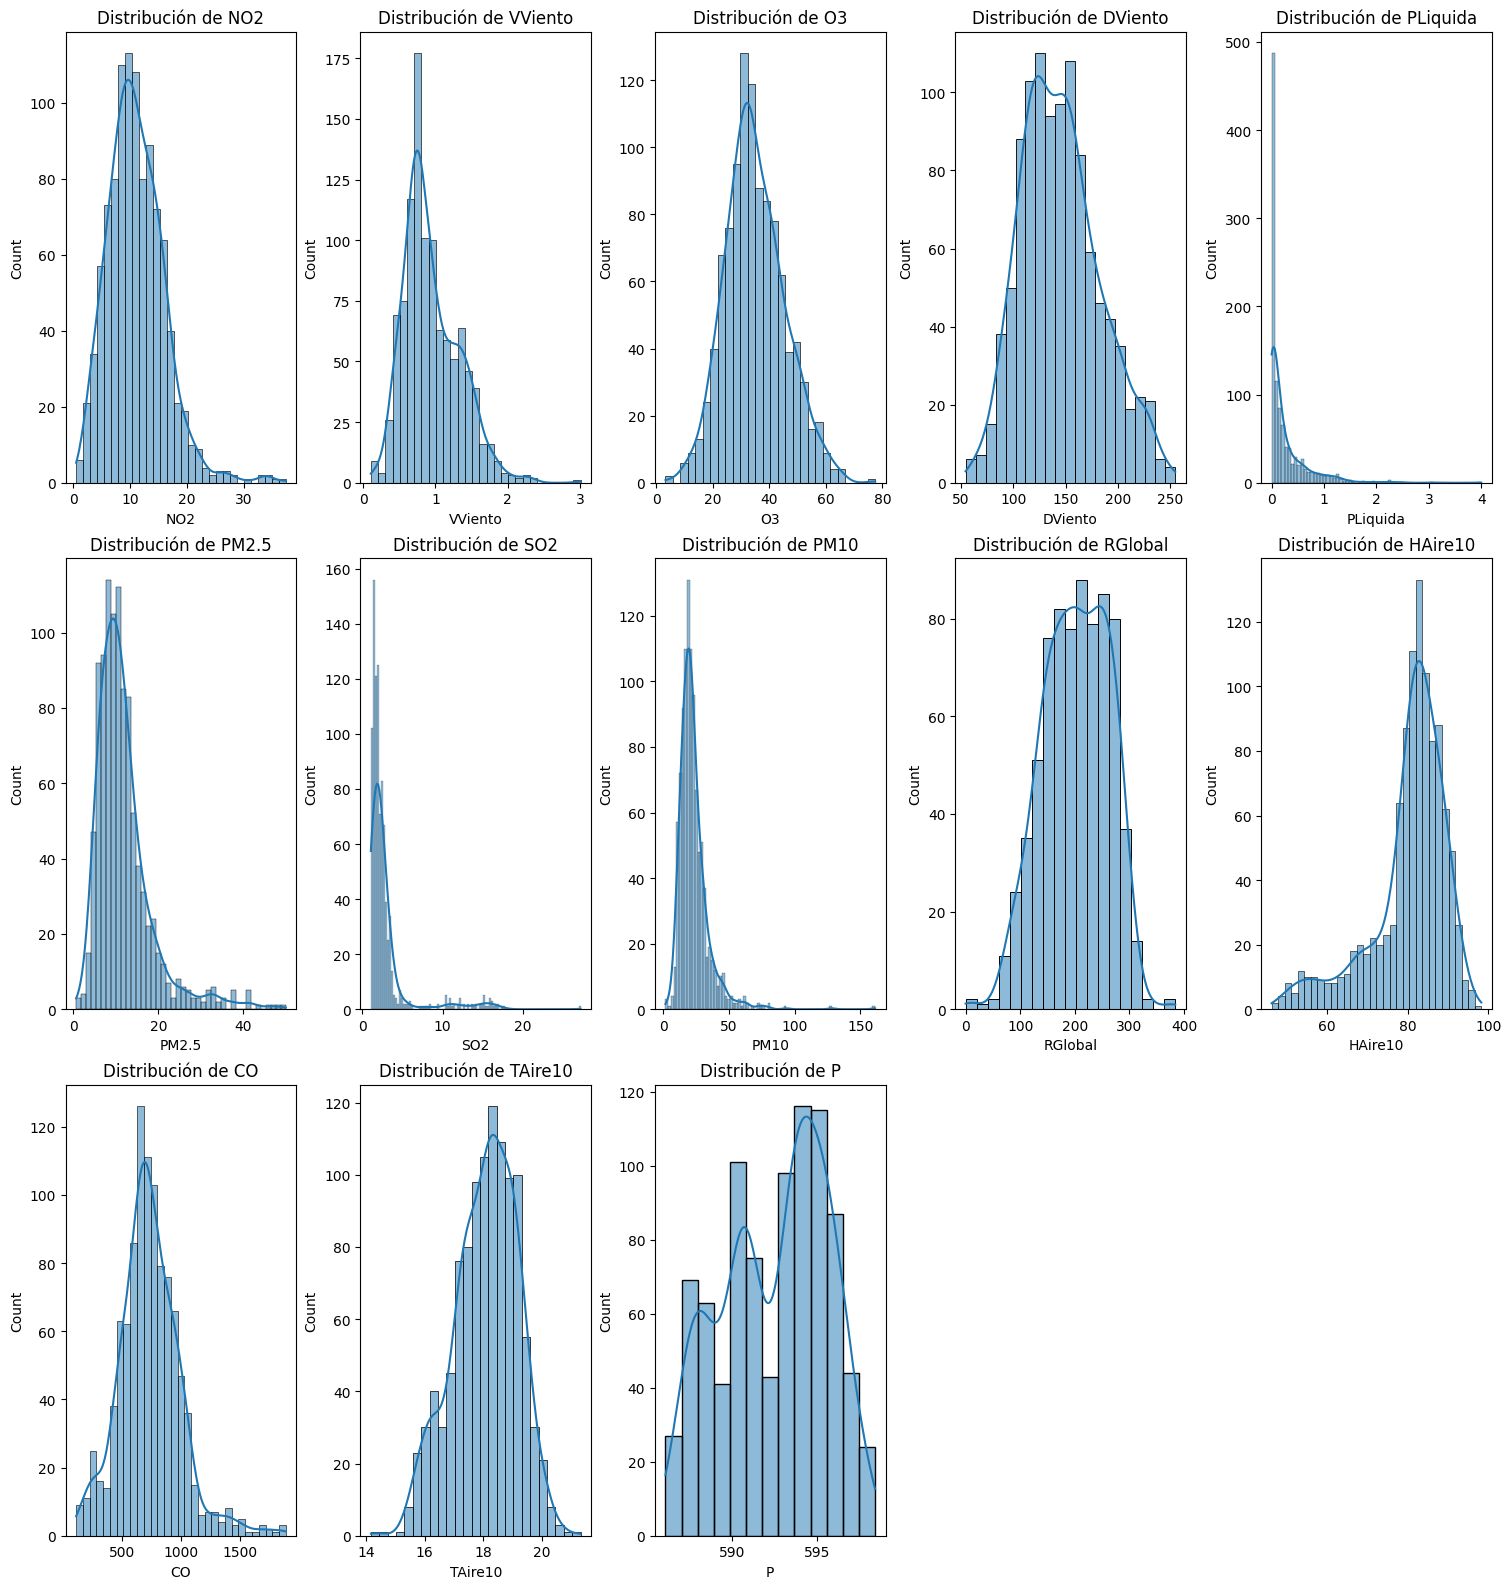

In [ ]:
numColumnas = 3  # Número de columnas en la cuadrícula
numFilas = (len(variablesNum) + numColumnas - 1) // numColumnas # Determinamos el número de filas necesario

fig, axes = plt.subplots(numFilas, numFilas, figsize=(15, 5 * numFilas), constrained_layout=True)
axes = axes.flatten()
for i, columna in enumerate(variablesNum):
    sns.histplot(df[columna], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {columna}", fontsize=12)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.show()

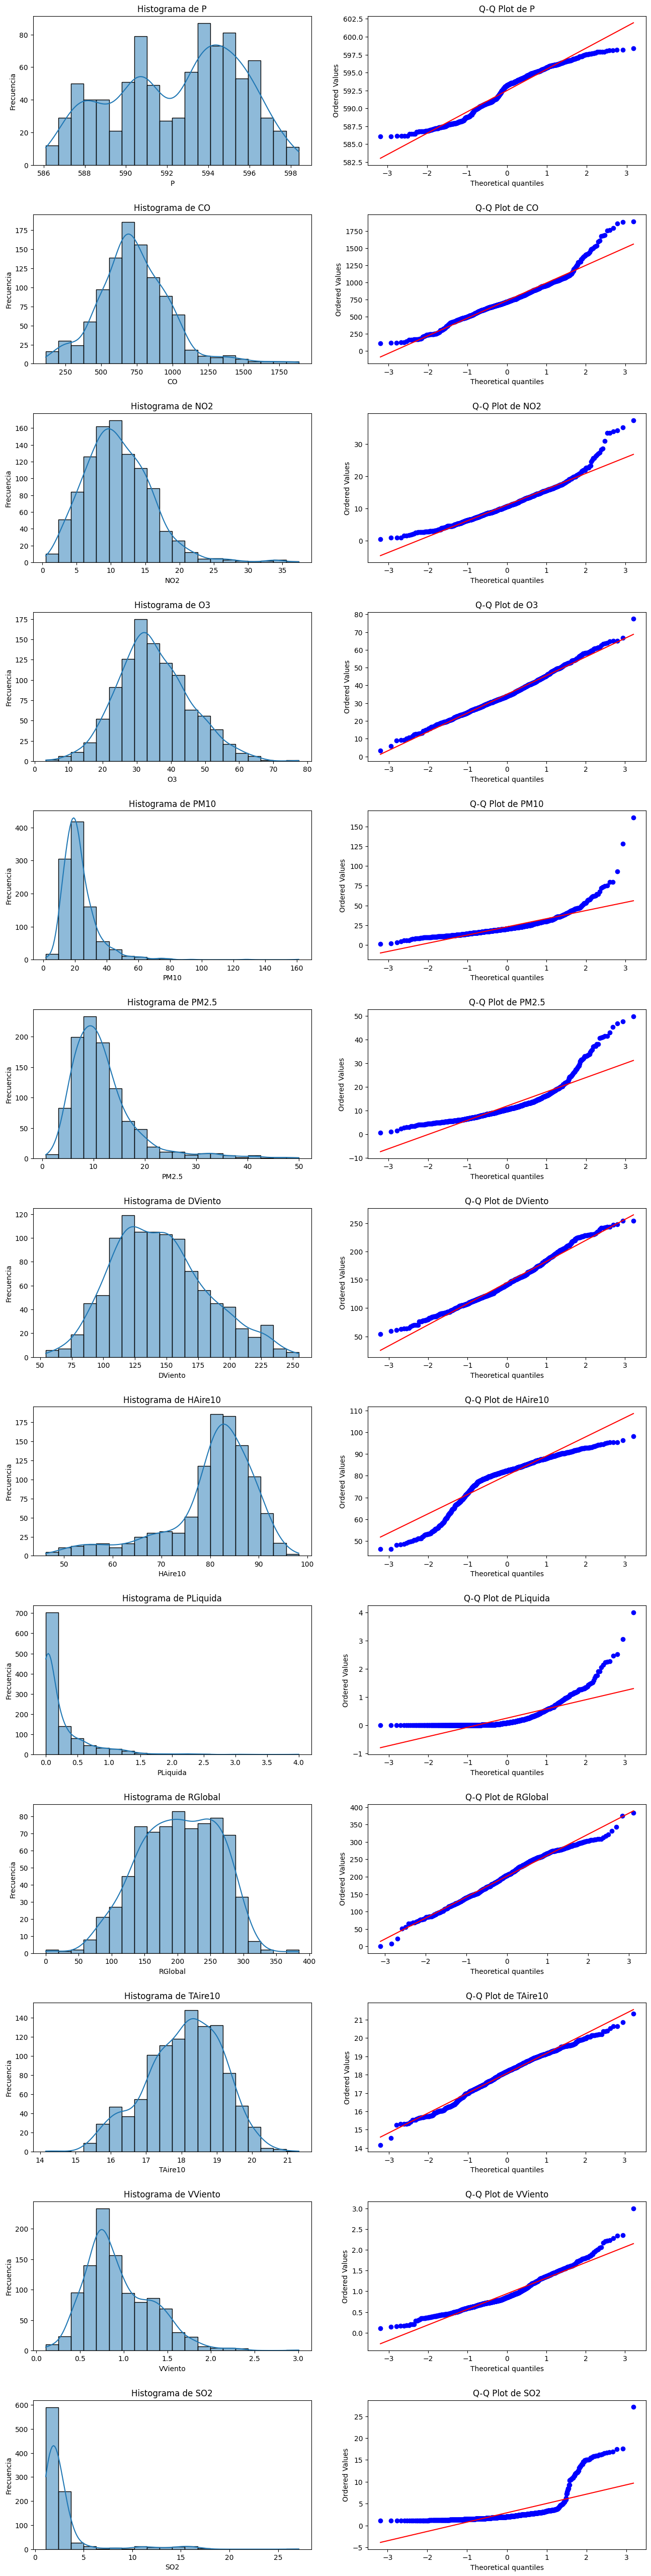

In [ ]:
# Seleccionar columnas relevantes para el análisis
columns_of_interest = ['P', 'CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'DViento', 'HAire10',
                       'PLiquida', 'RGlobal', 'TAire10', 'VViento', 'SO2']

# Filtrar solo las columnas relevantes
data_filtered = df[columns_of_interest]

# Crear figura para gráficos
fig, axes = plt.subplots(len(columns_of_interest), 2, figsize=(14, len(columns_of_interest) * 4))
fig.tight_layout(pad=5.0)

# Graficar histogramas y gráficos Q-Q
for i, column in enumerate(columns_of_interest):
    # Filtrar valores no nulos para la columna
    col_data = data_filtered[column].dropna()

    # Histograma
    sns.histplot(col_data, bins=20, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frecuencia')

    # Gráfico Q-Q
    stats.probplot(col_data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot de {column}')

plt.show()

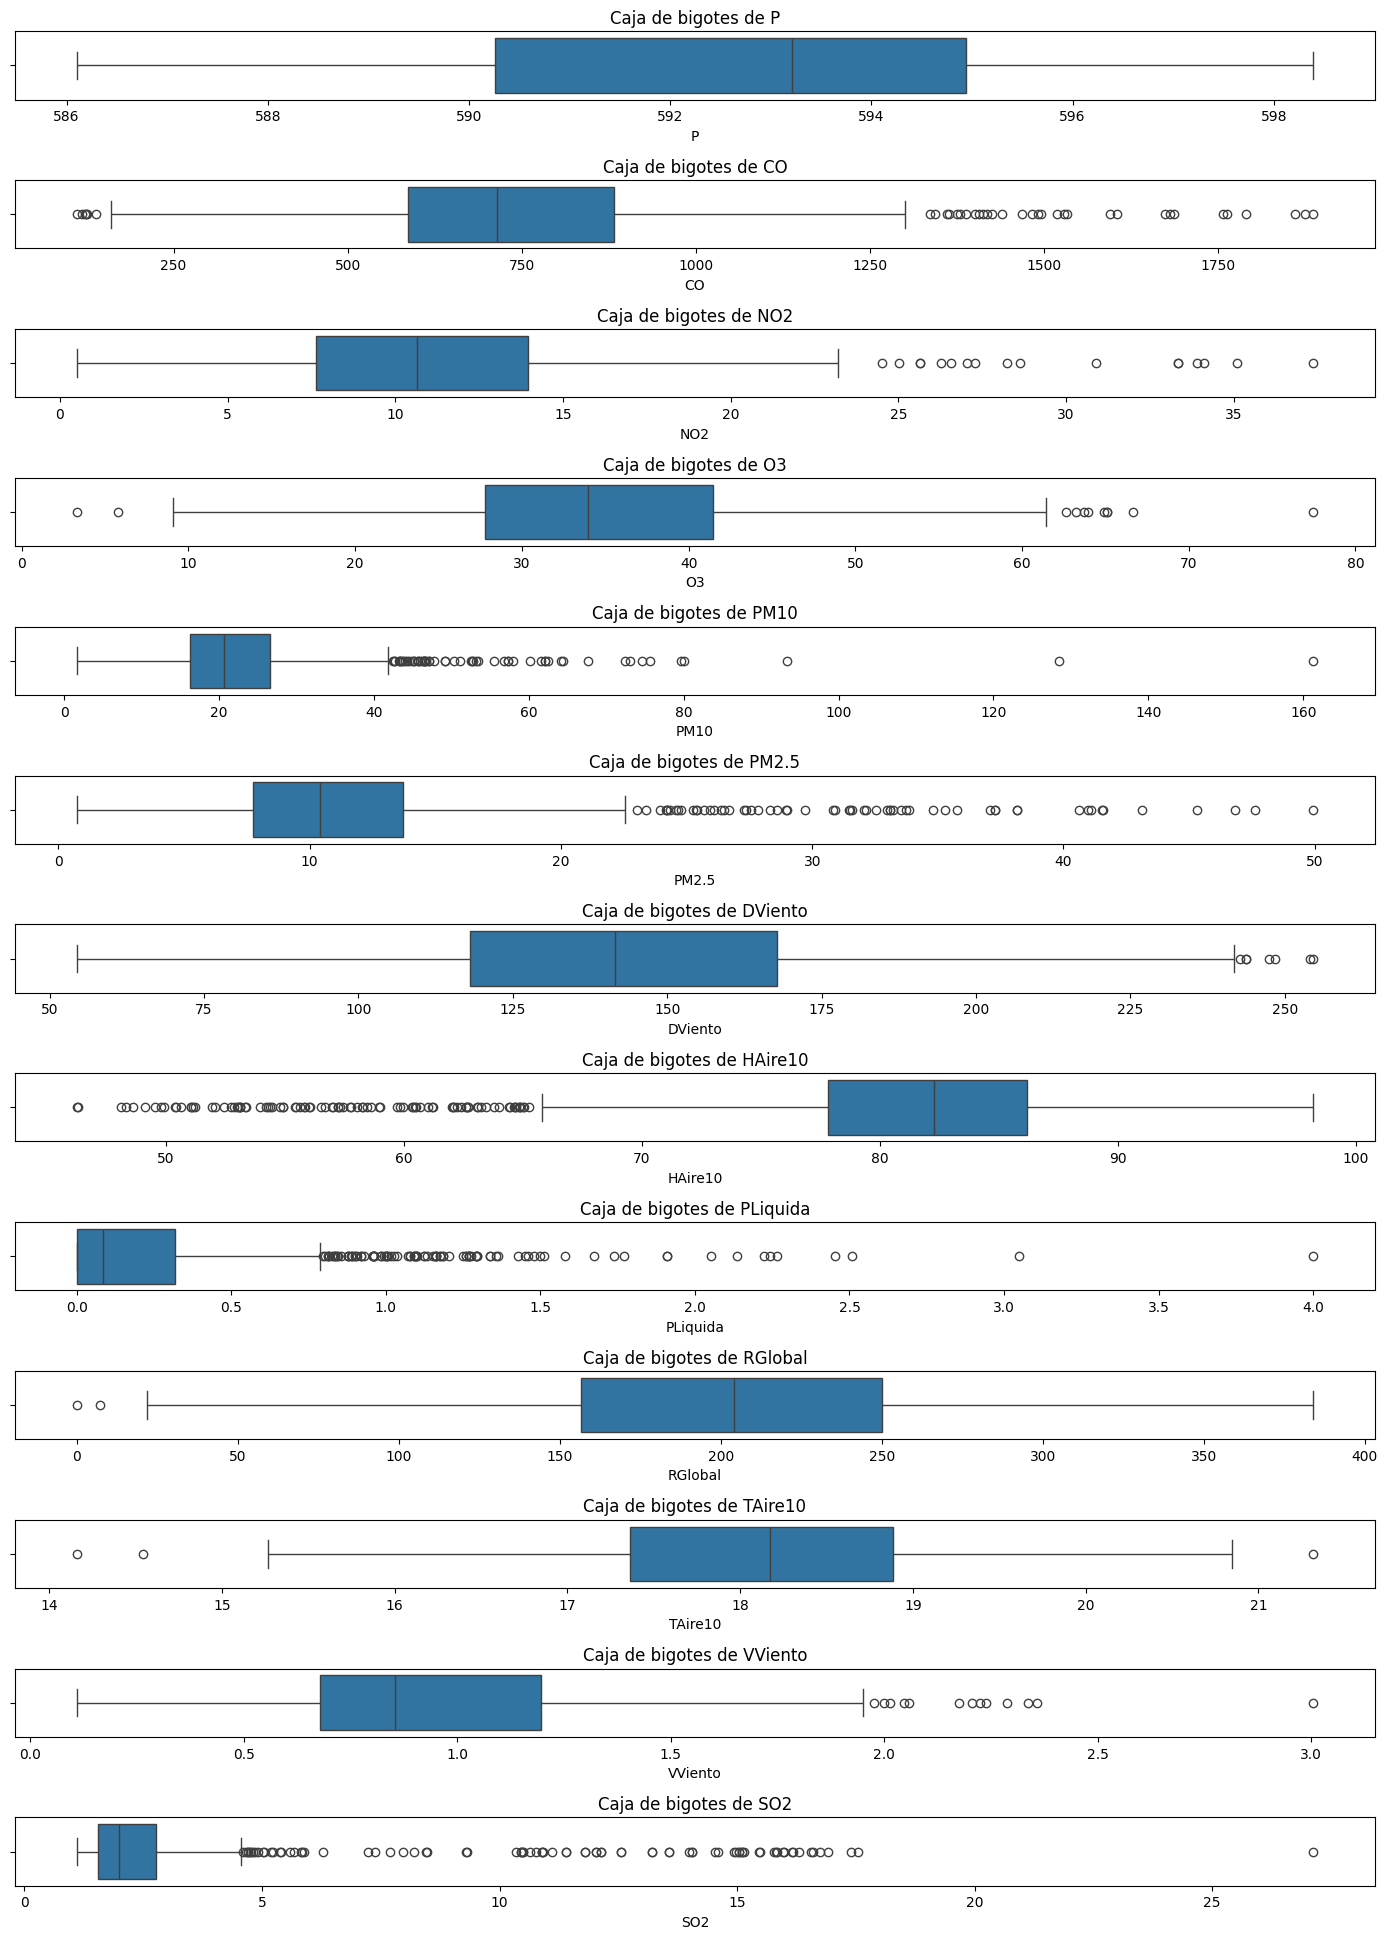

In [ ]:
# Crear una figura para los boxplots
plt.figure(figsize=(14, len(columns_of_interest) * 1.5))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 1, i)
    sns.boxplot(x=data_filtered[column].dropna())
    plt.title(f'Caja de bigotes de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117 entries, 0 to 237
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha inicial  1117 non-null   datetime64[ns]
 1   NO2            1027 non-null   float64       
 2   VViento        1056 non-null   float64       
 3   O3             1055 non-null   float64       
 4   DViento        1054 non-null   float64       
 5   PLiquida       1066 non-null   float64       
 6   PM2.5          1016 non-null   float64       
 7   SO2            932 non-null    float64       
 8   PM10           1017 non-null   float64       
 9   RGlobal        749 non-null    float64       
 10  HAire10        1066 non-null   float64       
 11  CO             1034 non-null   float64       
 12  TAire10        1084 non-null   float64       
 13  P              903 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 130.9 KB


Text(0.5, 1.0, 'Matriz de Correlación')

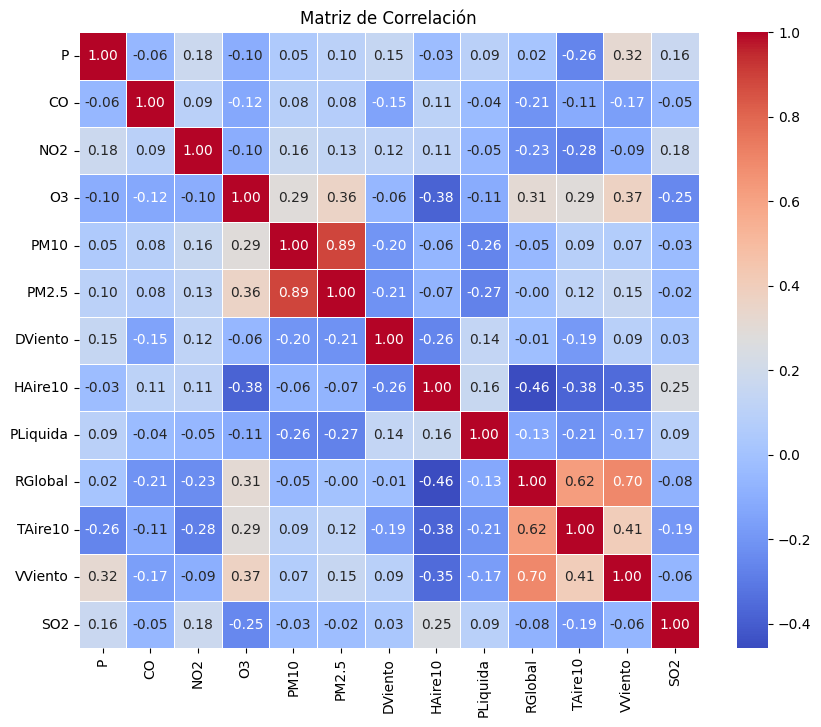

In [ ]:
# Calcular la matriz de correlación usando la lista columns_of_interest
correlation_matrix = df[columns_of_interest].corr()

# Configurar el tamaño de la gráfica
plt.figure(figsize=(10, 8))

# Crear el heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Agregar título
plt.title("Matriz de Correlación")

## Verificamos la existencia de datos Nullos

In [ ]:
df.isnull().sum()

,0
Fecha inicial,0
NO2,90
VViento,61
O3,62
DViento,63
PLiquida,51
PM2.5,101
SO2,185
PM10,100
RGlobal,368


## Transformacion

Como se evidencia datos nulos procederemos a imputarlos con el metodo KNN

In [ ]:
imputer=KNNImputer(n_neighbors=15)
dfImputado=imputer.fit_transform(df[variablesNum])
dfImputado=pd.DataFrame(dfImputado,columns=variablesNum)
dfImputado

,NO2,VViento,O3,DViento,PLiquida,PM2.5,SO2,PM10,RGlobal,HAire10,CO,TAire10,P
0,13.379167,0.358333,26.112500,123.750000,0.354167,6.652174,10.504167,13.559565,148.250000,87.083333,177.905263,16.054167,594.327500
1,15.400000,0.483333,25.920833,153.750000,0.354167,7.145833,10.891667,12.599583,114.166667,89.000000,273.506667,15.666667,594.505000
2,22.591304,0.408333,27.395238,182.812500,1.295833,10.341667,11.408333,19.012500,118.208333,87.166667,240.447619,15.733333,594.073377
3,25.652632,0.950000,32.285714,222.187500,0.512500,8.636364,10.450000,19.504545,180.208333,81.958333,247.530000,17.120833,593.529235
4,33.336364,0.504167,23.044444,177.187500,0.045833,12.578261,12.137500,25.856522,160.291667,83.750000,417.561111,17.300000,593.553389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,10.286364,1.395652,41.800000,106.630435,0.000000,28.595833,4.712500,42.650000,303.173913,75.652174,465.545833,19.958333,596.943478
1113,14.600000,1.083333,40.700000,128.437500,0.225000,25.945833,4.779167,37.091667,144.916667,83.958333,508.137500,18.512500,596.925000
1114,13.452174,1.500000,52.150000,199.687500,0.141667,9.838612,4.920833,19.872480,213.583333,79.708333,472.208333,19.391667,596.570833
1115,11.395000,1.725000,48.759091,123.750000,0.000000,33.720833,3.911111,46.225000,275.500000,77.875000,713.790909,19.908333,596.162500


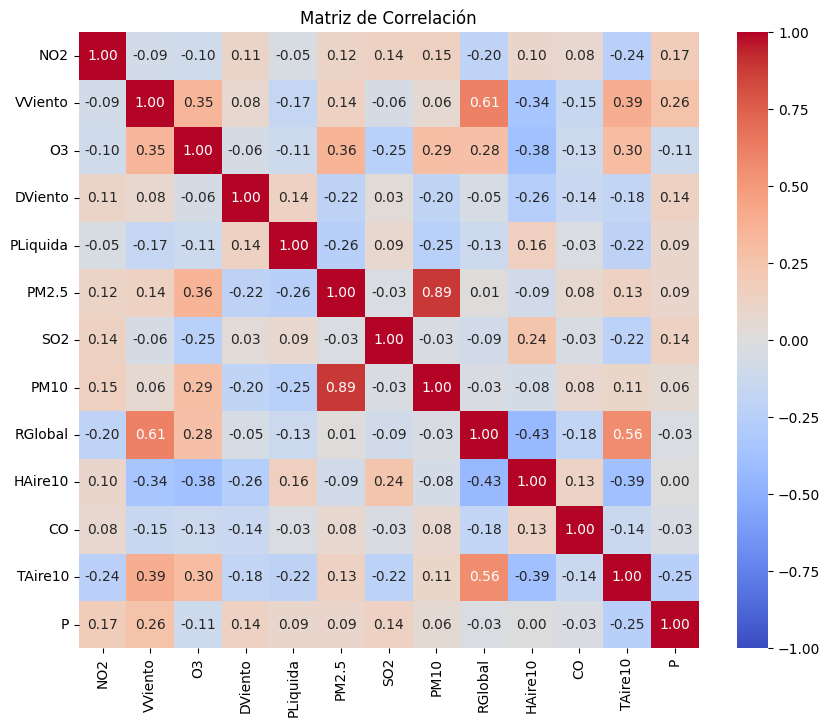

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = dfImputado.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Graficar la matriz de correlación con un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
for col in dfImputado.columns:
    print (col, np.sum(pd.isnull(dfImputado[col])))

NO2 0
VViento 0
O3 0
DViento 0
PLiquida 0
PM2.5 0
SO2 0
PM10 0
RGlobal 0
HAire10 0
CO 0
TAire10 0
P 0


#SE ALMACENA DATASET UNIFICADO

In [ ]:
import os
import joblib

# Ensure the directory exists
os.makedirs('./content/drive/My Drive/DATOS', exist_ok=True)
#Se guarda el DATASET UNIFICADO
joblib.dump(dfImputado,'./content/drive/My Drive/DATOS/DatosOrienteAntioqueno.csv')

['./content/drive/My Drive/DATOS/DatosOrienteAntioqueno.csv']